In [2]:
import numpy as np
import pandas as pd
import yellowbrick as yb
import matplotlib.pyplot as plt
import seaborn as sns

dados = pd.read_csv('flights.csv')

# Espaço Schengen: O Espaço Schengen é uma área geográfica que engloba a maioria dos países europeus, onde os controles de fronteira foram eliminados para permitir a livre circulação de pessoas entre os países membros. Essa área é denominada em referência ao Acordo de Schengen, assinado em 1985 na vila de Schengen, em Luxemburgo, e implementado em 1995.

       schengen      delay
0  non-schengen  15.350827
1      schengen  10.665156


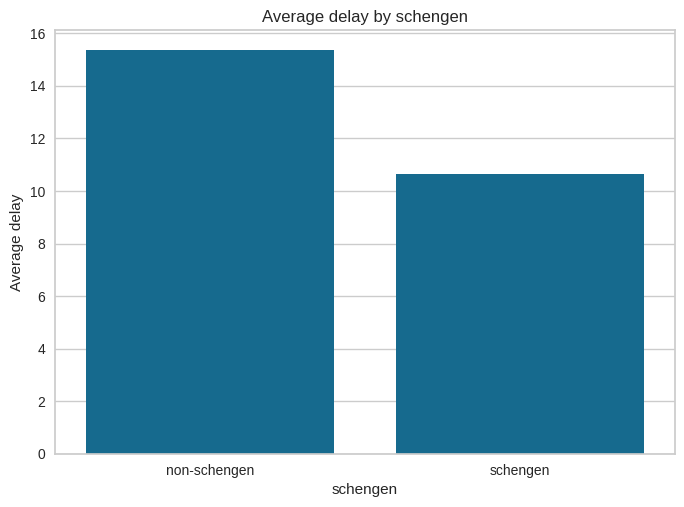

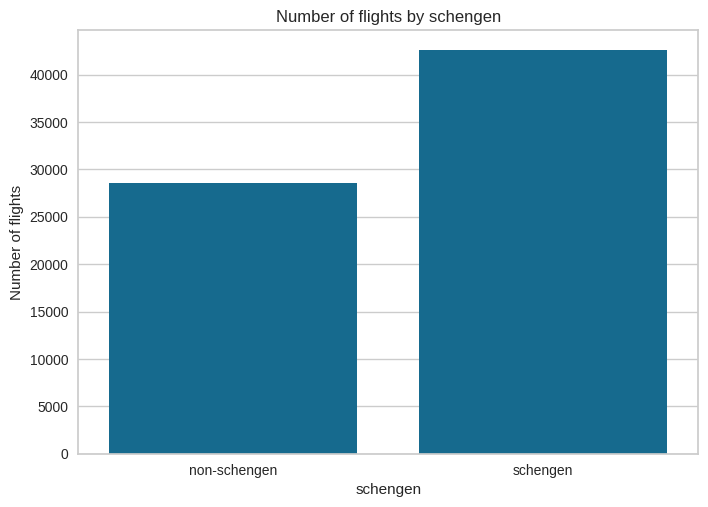

In [3]:
average_delay = dados.groupby('schengen')['delay'].mean().reset_index()
print(average_delay)
sns.barplot(x='schengen', y='delay', data=average_delay)
plt.title('Average delay by schengen')
plt.xlabel('schengen')
plt.ylabel('Average delay')
plt.show()

sns.countplot(x='schengen', data=dados)
plt.title('Number of flights by schengen')
plt.xlabel('schengen')
plt.ylabel('Number of flights')
plt.show()

   is_holiday      delay
0       False  10.835677
1        True  42.092465


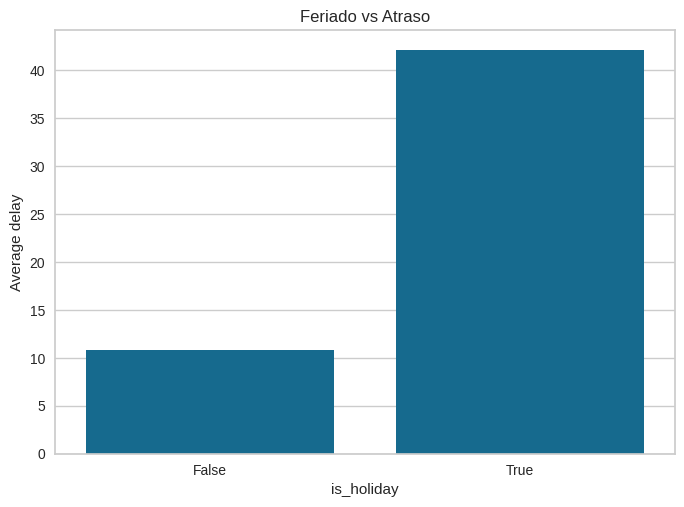

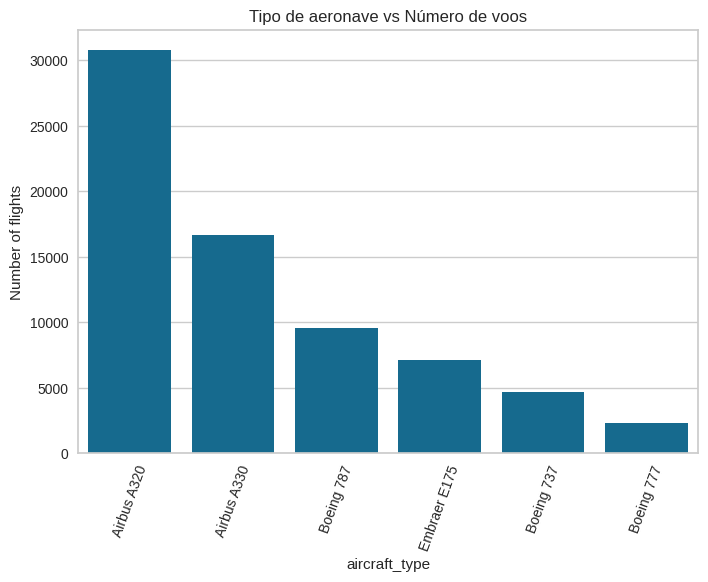

In [4]:
average_delay = dados.groupby('is_holiday')['delay'].mean().reset_index()
print(average_delay)
sns.barplot(x='is_holiday', y='delay', data=average_delay)
plt.title('Feriado vs Atraso')
plt.xlabel('is_holiday')
plt.ylabel('Average delay')
plt.show()

order = dados['aircraft_type'].value_counts().index
sns.countplot(x='aircraft_type', data=dados, order=order)
plt.title('Tipo de aeronave vs Número de voos')
plt.xticks(rotation=70)
plt.xlabel('aircraft_type')
plt.ylabel('Number of flights')
plt.show()

# Regra Freedman-Diaconis
Um regra usada em análise e estatística, para selecionar a largura dos compartimentos a serem usados em um histograma, ou seja a largura das barras no exemplo a seguir.

Largura do Bin = 2xIQR(x)/raizCúbica de n.

IQR é o intevalo interquartil dos dados e n é o número de observações na amostra x.

<Axes: xlabel='arrival_time', ylabel='Count'>

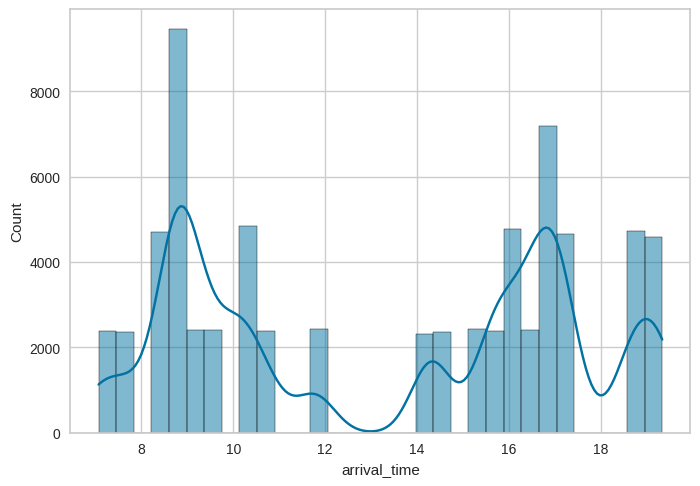

In [5]:
import numpy as np 

def calcularLarguraBin(dados, coluna):
    Q75, Q25 = np.percentile(dados[coluna], [75 ,25])
    IQR = Q75 - Q25
    larguraBin = 2 * IQR * np.power(len(dados[coluna]), -1/3)
    return larguraBin

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=calcularLarguraBin(dados, 'arrival_time'))

<Axes: xlabel='arrival_time', ylabel='Count'>

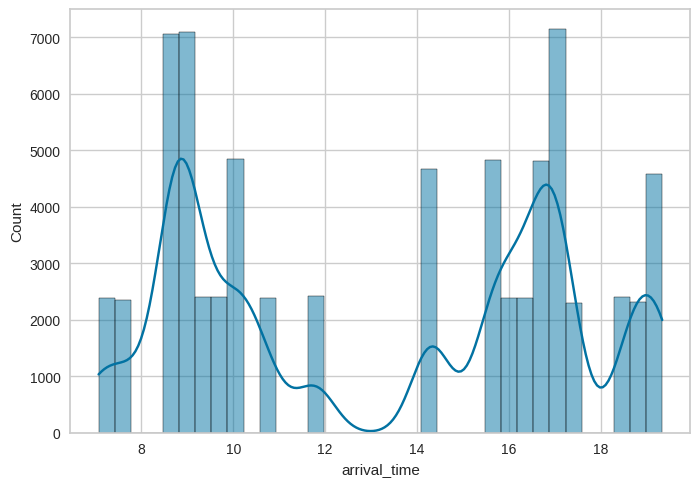

In [6]:
import numpy as np 

def calcularLarguraBin(dados, coluna):
    Q75, Q25 = np.percentile(dados[coluna], [75 ,25])
    IQR = Q75 - Q25
    larguraBin = 2 * IQR * np.power(len(dados[coluna]), -1/3)
    return larguraBin

sns.histplot(data=dados, x='arrival_time', kde=True, binwidth=calcularLarguraBin(dados, 'departure_time'))

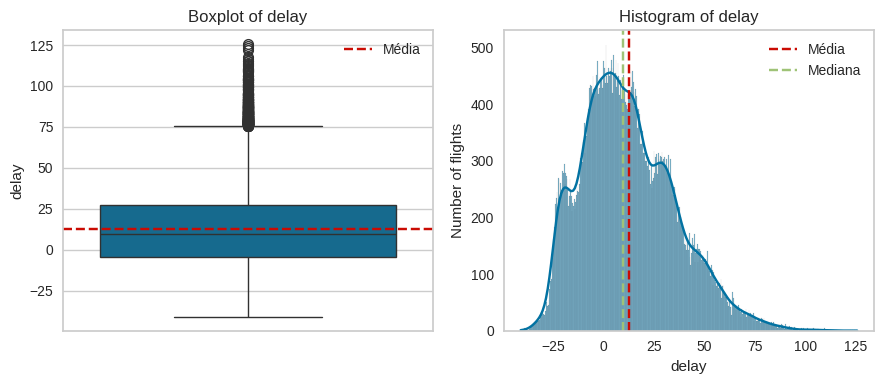

In [7]:
mean_delay = dados['delay'].mean()
median_delay = dados['delay'].median()

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(y='delay', data=dados, ax=axes[0])
axes[0].set_title('Boxplot of delay')

axes[0].axhline(mean_delay, color='r', linestyle='--', label='Média')
axes[0].legend()

largura_bin_delay = calcularLarguraBin(dados, 'departure_time')
sns.histplot(data=dados, x='delay', kde=True, ax=axes[1], binwidth=largura_bin_delay)
plt.ylabel('Number of flights')
plt.grid(False)
axes[1].set_title('Histogram of delay')

axes[1].axvline(mean_delay, color='r', linestyle='--', label='Média')
axes[1].axvline(median_delay, color='g', linestyle='--', label='Mediana')
axes[1].legend()

plt.tight_layout()
plt.show()

# Box Plot -> quartis do dataset

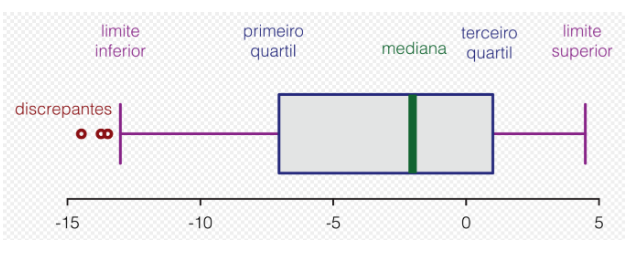

* O limite inferior é o valor mínimo que um dado pode ter sem ser considerado um valor atípico (outlier).
* O primeiro quartil (Q1) é o valor que divide os dados em 25% abaixo e 75% acima dele. Ou seja, 25% dos dados estão abaixo do Q1 e 75% estão acima.
* A mediana é o valor que divide os dados em 50% abaixo e 50% acima dele.
* O terceiro quartil (Q3) é o valor que divide os dados em 75% abaixo e 25% acima dele. Ou seja, 75% dos dados estão abaixo do Q3 e 25% estão acima.
* O limite superior é o valor máximo que um dado pode ter sem ser considerado um valor atípico. Ele é calculado como Q3 + 1,5 x IQR.

# Começando a classificação dos dados
## Objetivo :
* Tratamento de dados para inserção no modelo de Machine Learning

#### Atribuindo à coluna 'Date' a soma da coluna 'Year' + 'Day', porém a formatação da coluna 'Day' deve ser garantida. Na base de dados original, 'Day' está começando em 0 até 364, referindo ao primeiro dia do ano e último fim do ano. Logo, soma + 1 para termos os 365 dias.

In [8]:
dados['date'] = pd.to_datetime(dados['year'].astype(str) + '-' + (dados['day'] + 1).astype(str), format='%Y-%j')
dados.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01


#### Criando uma coluna chamada 'is_weekend', com o objetivo de retornar True ou False, para caso for feriado ou não.
#### A organização é baseada na biblioteca do Pandas, onde 'dt.weekday' retorna os dias da semana, onde 0 é Segunda e 6 é Domingo. Logo, se na nossa base, tivermos dados em 5 e 6 (Sábado e Domingo) temos que retornar True para a nova coluna, caso não esteja neste intervalo, retorna False.

In [9]:
dados['is_weekend'] = dados['date'].dt.weekday.isin([5, 6])
dados[['is_weekend', 'date']].head(50)

,is_weekend,date
0,False,2010-01-01
1,False,2010-01-01
2,False,2010-01-01
3,False,2010-01-01
4,False,2010-01-01
5,False,2010-01-01
6,False,2010-01-01
7,False,2010-01-01
8,False,2010-01-01
9,False,2010-01-01


#### Sabendo que 0 é Segunda e 6 é Domingo, podemos criar uma coluna com os nomes dos dias.

In [10]:
dados['day_name'] = dados['date'].dt.day_name()
dados.head(20)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981,2010-01-01,False,Friday
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609,2010-01-01,False,Friday
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305,2010-01-01,False,Friday
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491,2010-01-01,False,Friday
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271,2010-01-01,False,Friday
5,27,BZ,Airbus A320,schengen,AUZ,14.376052,16.376052,0,2010,False,9.842977,2010-01-01,False,Friday
6,25,BZ,Boeing 777,non-schengen,CSF,19.341235,23.341235,0,2010,False,39.012804,2010-01-01,False,Friday
7,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,12.546978,2010-01-01,False,Friday
8,22,YE,Airbus A320,non-schengen,MWL,8.794147,11.794147,0,2010,False,44.969728,2010-01-01,False,Friday
9,8,BZ,Airbus A320,schengen,ZQO,15.729617,18.729617,0,2010,False,20.957860,2010-01-01,False,Friday


### Dados com o número de valores únicos

In [11]:
dados.nunique()

flight_id            30
airline               3
aircraft_type         6
schengen              2
origin               10
arrival_time         30
departure_time       30
day                 365
year                 13
is_holiday            2
delay             71175
date               4745
is_weekend            2
day_name              7
dtype: int64

#### Alterando True ou False nas colunas [Schenge, Is_Holiday e Is_Weekend] para: onde for 0 é False, onde for 1 é True

In [12]:
dados['schengen'] = dados['schengen'].map({'non-schengen': 0, 'schengen': 1})
dados['is_holiday'] = dados['is_holiday'].map({False: 0, True: 1})
dados['is_weekend'] = dados['is_weekend'].map({False: 0, True: 1})

### Trabalhando com variáveis que não são binárias, ou seja, tem mais que 2 valores atribuidos.

In [13]:
variaveis_categoricas = ['day_name', 'aircraft_type', 'origin', 'airline']
dados['airline'].unique()

array(['MM', 'YE', 'BZ'], dtype=object)

#### Vamos criar colunas binárias para essas colunas que tinham mais valores atribuidos. 
* Ao usar a função 'get_dummies', criasse uma coluna binária para cada valor das colunas originais. Ex: A coluna 'origin' tem 6 valores, logo teremos agora 6 novas colunas, uma para cada valor, onde caso exista informação para a mesma, será True, caso não, False.

In [14]:
df_encoded = pd.get_dummies(data=dados, columns=variaveis_categoricas, dtype=int)
df_encoded.head(2)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,airline_BZ,airline_MM,airline_YE
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,0,0,0,0,1,0,0,0,1,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,0,0,0,0,1,0,0,0,0,1


In [15]:
dados[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


#### Removendo do DataFrame, colunas que não interessam mais para nosso modelo que iremos treinar.

In [16]:
df_clean = df_encoded.drop(columns=['date', 'year', 'day', 'flight_id', 'departure_time'], axis=1)
df_clean.head()

,schengen,arrival_time,is_holiday,delay,is_weekend,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,...,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,airline_BZ,airline_MM,airline_YE
0,0,8.885071,0,70.205981,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,8.939996,0,38.484609,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,18.635384,0,2.388305,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,15.967963,0,19.138491,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,16.571894,0,15.016271,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


### Treinamento do DummyRegressor

X é nossa variável explicativa, ou comumente chamada, nossa Training-Data. E Y nossa variável target.

In [17]:
x = df_clean.drop(['delay'], axis=1)
y = df_clean['delay']
x

,schengen,arrival_time,is_holiday,is_weekend,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,...,origin_EMM,origin_FJB,origin_MWL,origin_PUA,origin_TCY,origin_TZF,origin_ZQO,airline_BZ,airline_MM,airline_YE
0,0,8.885071,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,8.939996,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,18.635384,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,0,15.967963,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0,16.571894,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,18.635384,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,0
71171,0,16.718722,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
71172,1,8.564949,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
71173,1,9.344097,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,random_state=42)
y_test

40337    -4.298068
9354     29.712747
64321    20.725673
24993    55.791744
10688    16.965341
           ...    
30570    11.806869
3030     48.473172
33391     5.369444
26753    41.587399
69244     9.942488
Name: delay, Length: 17794, dtype: float64

In [19]:
from sklearn.dummy import DummyRegressor

model_dummy = DummyRegressor()
model_dummy.fit(x_train, y_train)

DummyRegressor()

Média do conjunto de treinamento.

In [20]:
y_pred_dummy = model_dummy.predict(x_test)
y_pred_dummy[:5]

array([12.52857512, 12.52857512, 12.52857512, 12.52857512, 12.52857512])

In [21]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

def calcularMetricasRegressao(y_test, y_pred):
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metricas = {
        'Raiz do erro quadrático Médio': round(rmse, 4),
        'Erro Absoluto Médio': round(mae, 4),
        'R2': round(r2, 4)
    }
    
    return metricas

In [22]:
calcularMetricasRegressao(y_test, y_pred_dummy)

{'Raiz do erro quadrático Médio': 23.2241,
 'Erro Absoluto Médio': 18.6127,
 'R2': -0.0}

### Treinamento do RandomForestRegressor


In [23]:
from sklearn.ensemble import RandomForestRegressor

# Treinando o modelo
# max_depth=5 é o número máximo de níveis da árvore, se não setar o valor, a árvore crescerá até que todas as folhas sejam puras, ou seja, podendo gerar overfitting quando formos prever novos dados.
# random_state=42 é a semente aleatória para garantir a reprodutibilidade do modelo, assim eu garanto que o modelo será treinado da mesma forma sempre que eu rodar o código, porque teremos uma aleatoriedade controlada.
model_rf = RandomForestRegressor(max_depth=5, random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
calcularMetricasRegressao(y_test, y_pred_rf)

{'Raiz do erro quadrático Médio': 13.7301,
 'Erro Absoluto Médio': 11.0138,
 'R2': 0.6505}

### Raiz de erro médio significa que nosso modelo erra em média 13.7 minutos nas nossas previsões de vôos.
### Quanto mais próximo de 1, for o R2, melhor é o modelo treinado, ou seja, utilizando o RandomForestRegressor, tivemos um erro menor e um modelo melhor do que o dummyRegressor.

## Interpretando gráficamente com o Yellowbrick
### identity é a linha idea, e best fit é a linha de valores previsto pelo modelo, ou seja, quanto mais próxima elas forem, mais reais são os dados.

/home/vinicius/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


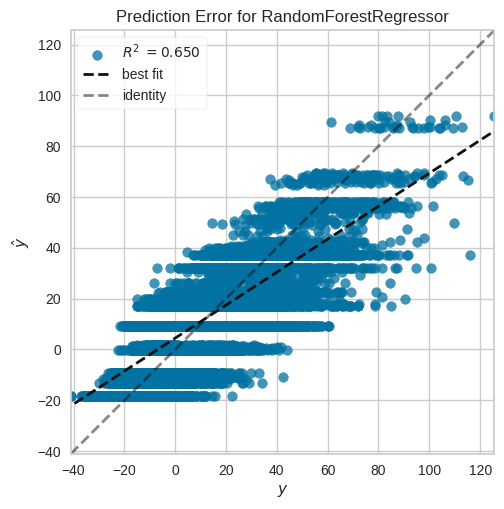

In [24]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(model_rf, x_train, y_train, x_test, y_test)

## Outro gráfico para ver resíduos, valor predito - valor real
### Residuals_plot

/home/vinicius/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


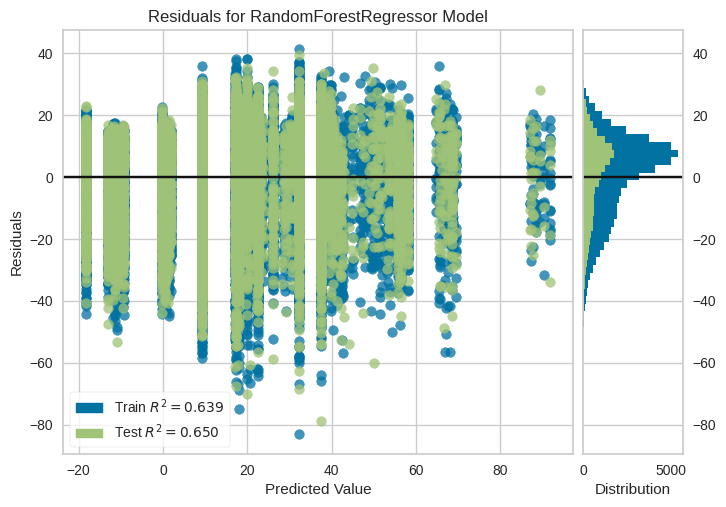

In [25]:
from yellowbrick.regressor import residuals_plot

viz = residuals_plot(model_rf, x_train, y_train, x_test, y_test)

## Como interpretar esse gráfico ?
### Quanto mais distríbuido aleatóriamente em torno da linha 0. Se estiver muito aglomerado próximo a linha zero o modelo não está legal.

# Validação Cruzada
### Para termos condições de cruzar as informações e saber que nosso modelo foi bem treinado.

In [26]:
from sklearn.model_selection import KFold, cross_validate

scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error',
    'r2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)

resultados = cross_validate(model_rf, x_train, y_train, cv=cv, scoring=scoring)
resultados

{'fit_time': array([1.66994905, 1.63993287, 1.67465162, 1.65150619, 1.67304182]),
 'score_time': array([0.02723932, 0.02830267, 0.02767825, 0.02740908, 0.02791309]),
 'test_mae': array([-11.07421449, -11.30328674, -11.05630068, -11.14454886,
        -11.17423931]),
 'test_rmse': array([-13.76668658, -14.04881475, -13.79310018, -13.87672957,
        -13.9303929 ]),
 'test_r2': array([0.64679676, 0.62433581, 0.64536956, 0.64090813, 0.63477298])}

In [27]:
## Organizando os resultados
for metric in scoring.keys():
    scores = resultados['test_' + metric]
    mean_score = "{:.3f}".format(scores.mean())
    std_score = "{:.3f}".format(scores.std())
    
    print(f"{metric.upper()} Scores: {[f'{score:.3f}' for score in scores]}")
    print(f"{metric.upper()} Mean: {mean_score}, Std: {std_score}")
    print('--------------------------------------------------------------------')

MAE Scores: ['-11.074', '-11.303', '-11.056', '-11.145', '-11.174']
MAE Mean: -11.151, Std: 0.088
--------------------------------------------------------------------
RMSE Scores: ['-13.767', '-14.049', '-13.793', '-13.877', '-13.930']
RMSE Mean: -13.883, Std: 0.101
--------------------------------------------------------------------
R2 Scores: ['0.647', '0.624', '0.645', '0.641', '0.635']
R2 Mean: 0.638, Std: 0.008
--------------------------------------------------------------------


## Com a validação cruzada podemos observar que nossos valores obtidos pelo RandomForestRegressor foram muito próximos aos valores que cruzamos com o método de cruzamento de dados.
### Ou seja, dividimos o conjunto em k partes iguais, treinamos o modelo em k-1 partes e avaliamos o modelo na parte restante, repetindo k vezes, sempre uma parte diferente sendo usada do conjunto de testes. Os dados de treino e testes ficaram bem divididos e nosso modelo foi bem treinado.

# Para o próximo passo precisamos identificar quais são as features mais importantes, ou seja, quais são as features que estão impactando no nosso modelo.
## Para isso iremos retrinar o modelo, porém utilizando somente as features mais importantes.

/home/vinicius/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


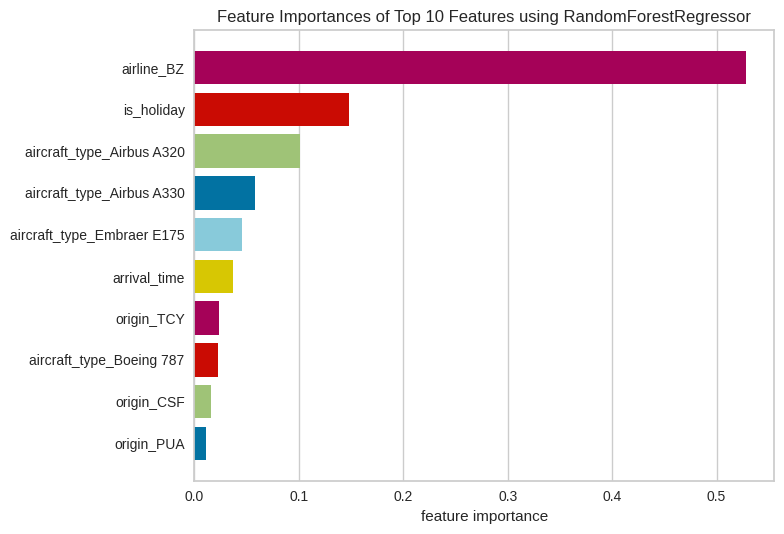

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [29]:
from yellowbrick.model_selection import FeatureImportances

viz = FeatureImportances(model_rf, relative=False, topn=10)
viz.fit(x_train, y_train)
viz.show()

In [34]:
importances = model_rf.feature_importances_
feature_importances = pd.DataFrame({'Features': x.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)
feature_importances

,Features,Importance
27,airline_BZ,0.528604
2,is_holiday,0.147833
11,aircraft_type_Airbus A320,0.100711
12,aircraft_type_Airbus A330,0.058223
16,aircraft_type_Embraer E175,0.045614
1,arrival_time,0.036550
24,origin_TCY,0.023668
15,aircraft_type_Boeing 787,0.023114
19,origin_CSF,0.015793
23,origin_PUA,0.010825


In [38]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(max_depth=5, random_state=42)

for count in [1, 5, 10, 15, 20, 25, 30]:
    selected_features = feature_importances['Features'].values[:count]
    
    x_train_selected = x_train[selected_features]
    x_test_selected = x_test[selected_features]
    
    model_selected_features.fit(x_train_selected, y_train)
    y_pred = model_selected_features.predict(x_test_selected)
    
    metricas = calcularMetricasRegressao(y_test, y_pred)
    results_df[count] = list(metricas.values())

results_df

,1,5,10,15,20,25,30
RMSE,18.8639,15.1651,13.7426,13.7335,13.7303,13.7307,13.7301
MAE,14.9854,12.0714,11.0282,11.0164,11.0137,11.0142,11.0138
R2,0.3402,0.5736,0.6498,0.6503,0.6505,0.6504,0.6505


## Dessa forma, conseguimos diminuir a complexidade dos nossos dados para ser inserido em um modelo de machine learning. Assim, reduzimos a complexidade desse modelo. Com isso vai ajudar, inclusive, o desempenho do modelo.

## Vai ser mais rápido de treinar, justamente porque tem menos dados. No entanto, ainda não melhoramos a performance desse modelo. Apenas selecionamos as features mais importantes.

In [39]:
results_df = pd.DataFrame(index=['RMSE', 'MAE', 'R2'])

model_selected_features = RandomForestRegressor(max_depth=5, random_state=42)

for count in range(10, 16):
    selected_features = feature_importances['Features'].values[:count]
    
    x_train_selected = x_train[selected_features]
    x_test_selected = x_test[selected_features]
    
    model_selected_features.fit(x_train_selected, y_train)
    y_pred = model_selected_features.predict(x_test_selected)
    
    metricas = calcularMetricasRegressao(y_test, y_pred)
    results_df[count] = list(metricas.values())

results_df

,10,11,12,13,14,15
RMSE,13.7426,13.7378,13.7344,13.7348,13.7335,13.7335
MAE,11.0282,11.0258,11.0173,11.0177,11.0164,11.0164
R2,0.6498,0.6501,0.6503,0.6502,0.6503,0.6503


In [41]:
selected_features = feature_importances['Features'].values[:13]
x_selected_features = x[selected_features]
x_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,origin_TCY,aircraft_type_Boeing 787,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,1,0,0,0,0,1,0
1,0,0,1,0,0,8.939996,1,0,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,0,1,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_selected_features, y, random_state=42)

----------------------------------

## Otimizando os hiperparâmetros com o GridSearchCV

In [44]:
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [100, 150, 200]
}

In [45]:
from sklearn.model_selection import GridSearchCV

In [47]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
model_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, scoring='r2', cv=cv)

# Treinando o modelo com as melhores features
model_grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [48]:
# Melhores parâmetros do modelo
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [49]:
y_pred_model_grid = model_grid.predict(x_test)


metricas_model_grid = calcularMetricasRegressao(y_test, y_pred_model_grid)
metricas_model_grid

{'Raiz do erro quadrático Médio': 13.2308,
 'Erro Absoluto Médio': 10.6296,
 'R2': 0.6754}

In [50]:
results_df['model_grid'] = list(metricas_model_grid.values())
results_df

# Visualizando a importância das features e comparando com o modelo anterior

,10,11,12,13,14,15,model_grid
RMSE,13.7426,13.7378,13.7344,13.7348,13.7335,13.7335,13.2308
MAE,11.0282,11.0258,11.0173,11.0177,11.0164,11.0164,10.6296
R2,0.6498,0.6501,0.6503,0.6502,0.6503,0.6503,0.6754


## Vemos que no nosso novo modelo, obtivemos melhores resultados, o RMSE por exemplo, diminui consideravelmente.

#### Para calcular quantas vezes o algoritmo é treinado e testado, multiplicamos o número de combinações únicas de hiperparâmetros pelo número de folds na validação cruzada. Existem 3 opções para 'max_depth', 3 para 'min_samples_leaf', 3 para 'min_samples_split' e 3 para 'n_estimators'. Portanto, o número total de combinações únicas de hiperparâmetros é 3 * 3 * 3 * 3 = 81. Como estamos usando validação cruzada de 5 folds, cada conjunto de hiperparâmetros será treinado e testado 3 vezes. Portanto, o algoritmo será treinado e testado 81 * 5 = 405 vezes no total.

### N_estimators
#### Este hiperparâmetro especifica o número de árvores de decisão que serão criadas na floresta aleatória. Quanto maior o número de estimadores, maior será a capacidade do modelo de se ajustar aos dados. No entanto, um número muito alto pode levar a um aumento no tempo de treinamento.

### max_depth
#### Este hiperparâmetro controla a profundidade máxima das árvores de decisão na floresta. Limitar a profundidade pode ajudar a evitar overfitting, pois impede que as árvores se ajustem muito aos dados de treino e não consigam fazer boas previsões para novos dados.

### min_samples_split
#### determina o número mínimo de amostras necessárias para dividir um nó interno da árvore. Isso ajuda a controlar o crescimento das árvores e evita divisões que levam a nós com poucas amostras.

### min_samples_leaf
#### Este hiperparâmetro define o número mínimo de amostras exigidas em uma folha (nó terminal) da árvore. Isso ajuda a controlar a granularidade da árvore e pode impedir que folhas contenham muito poucas amostras.

# Salvando o modelo

In [51]:
import pickle

In [52]:
try:
    with open('model_producao.pkl', 'wb') as file:
        pickle.dump(model_grid.best_estimator_, file)
    print('Modelo salvo com sucesso!')
except Exception as e:
    print('Erro ao salvar o modelo:', str(e))

Modelo salvo com sucesso!


In [59]:
nova_amostra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
model = model_grid.best_estimator_
model.predict([nova_amostra])

/home/vinicius/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([48.82324945])

In [60]:
# array([48.82324945]) 
# O modelo prevê um atraso de 48 minutos para a nova amostra